In this notebook, I will discuss the use of Monte Carlo simulations to price options.

Monte Carlo simulation is a numeric technique used to price many kinds of options, where finding a closed form solution may be a difficult task.

The theory says that the fair value of an option is the present value of the expected payoff at expiry under a *risk-neutral* random walk for the underlying.

The risk neutral random walk for the underlying $S$ is given by the SDE $dS = rS dt + \sigma S dX$. this equation is the usual log-normal random walk with the risk-free rate $r$ replacing $\mu$.

The algorithm to implement this method of pricing is given below:

1. Simulate the risk-neutral random walk using the SDE $dS = rS dt + \sigma S dX$, starting with today's asset value $S_0$.

2. For each realization, calculate the option payoff at expiry.

3. Run many such realizations and calculate the expected payoffs at expiry for every realization.

4. Calculate average payoff for all the realizations.

5. Discount the expected payoff to get the option price today.

In order to simulate the risk-neutral random walk, we need to use the **Euler-maruyama** discretization scheme.

$S_{t+\delta t} = S_t * (1+ r \delta t + \sigma w_t \sqrt{\delta t} )$ where, $w_t$ is a standard normal random variable.

I will implement the algorithm below. I will first define a user defined function which will take the initial asset value $S_0$, $\mu$, $\sigma$, horizon, number of time steps, and number of simulations to produce as arguments. The function will take these arguments and give the paths that the asset may take. It will also plot the realizations, in a graph.

In [10]:
# libraries

import pandas as pd
from numpy import *
import numpy as np
import matplotlib.pyplot as plt

In [23]:
# The simulation function

def simulate_monte_carlo_paths(s0, mu, sigma, horizon, no_of_timesteps, no_of_sims):
    
    random.seed(53434)
    
    dt = horizon/no_of_timesteps
    
    rows = no_of_sims
    cols = no_of_timesteps
#     fig, ax = plt.subplots()
#     ax.set_xlim(0, cols)
#     ax.set_ylim(0, s0 * 2.5)

    S = np.full((rows, cols), None)

    S[:, 0] = s0
    
    for i in range(1,cols):
        S[:,i] = S[:,i-1] * (1 + mu * dt + sigma * np.sqrt(dt) * np.random.randn(no_of_sims))
        
#     for row in range(no_of_sims):
#         ax.plot(S[row, :])
#     ax.set_xlabel('Time steps')
#     ax.set_ylabel('Asset Value')
#     ax.set_title('Realizations of MC simulations')
    
    return S
    

Now that we have a function to generate price Monte Carlo realizations, I will now write functions to calculate the value of a European option by discounting the expected payoff at expiry.

In [24]:
def call_option_value(s0, sigma, horizon, no_of_timesteps, no_of_sims, strike_price, risk_free_rate):
    
    S = simulate_monte_carlo_paths(s0,risk_free_rate,sigma,horizon,no_of_timesteps,no_of_sims)
    
    C0 = exp(-risk_free_rate*horizon) * mean(maximum(0, S[-1]-strike_price))
    del S
    return C0

def put_option_value(s0, sigma, horizon, no_of_timesteps, no_of_sims, strike_price, risk_free_rate):
    
    S = simulate_monte_carlo_paths(s0,risk_free_rate,sigma,horizon,no_of_timesteps,no_of_sims)
    
    P0 = exp(-risk_free_rate*horizon) * mean(maximum(0, strike_price - S[-1]))
    del S
    return P0

In [25]:
print(f"European Call Option Value is {call_option_value(100, 0.2, 1, 252, 1000000, 105, 0.05):0.4f}")


European Call Option Value is 20.3635


In [26]:
print(f"European Put Option Value is {put_option_value(100, 0.2, 1, 252, 1000000, 105, 0.05):0.4f}")

European Put Option Value is 0.9569


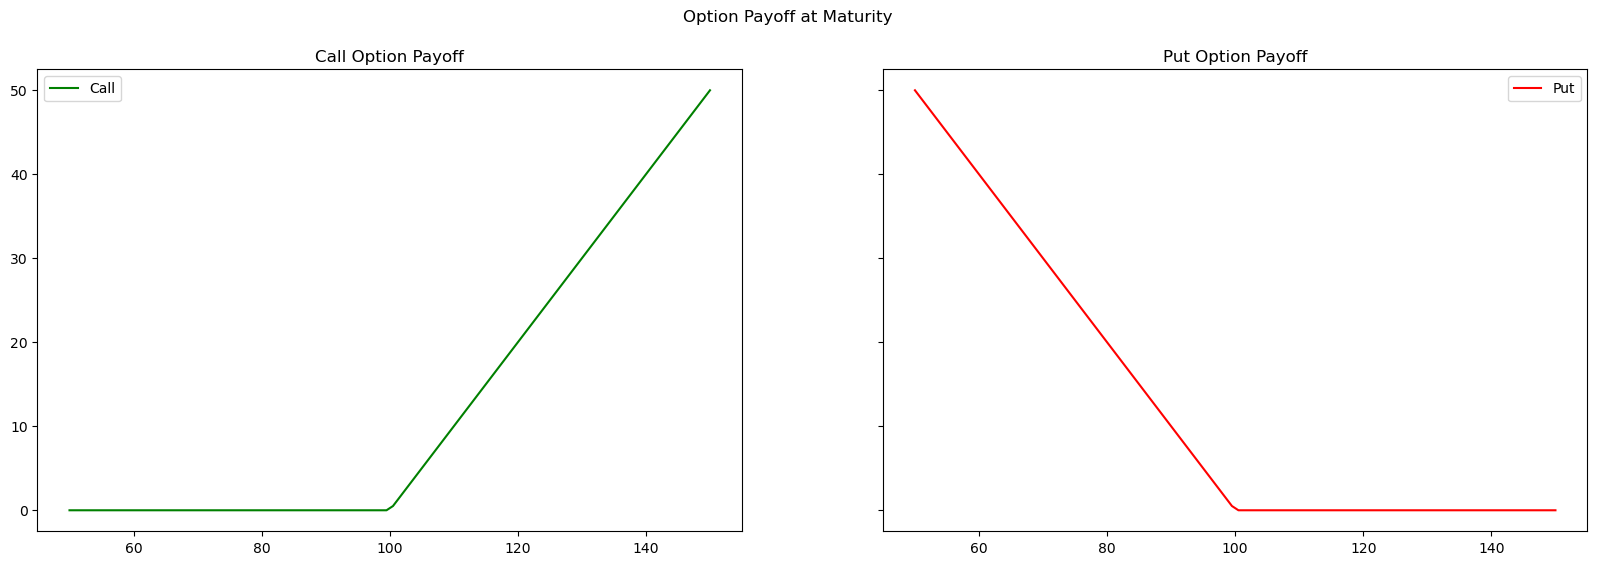

In [27]:
# payoff chart to illustrate how payoffs vary with terminal spot prices at expiry for call and put options

sT_vector = linspace(50,150,100)
E = 100           # Strike price
figure, axes = plt.subplots(1,2, figsize=(20,6), sharey=True)
title, payoff, color, label = ['Call Option Payoff', 'Put Option Payoff'], [maximum(sT_vector-E, 0), maximum(E-sT_vector, 0)], ['green', 'red'], ['Call', 'Put']
# plot payoff
for i in range(2):
    axes[i].plot(sT_vector, payoff[i], color=color[i], label=label[i])
    axes[i].set_title(title[i])
    axes[i].legend()
figure.suptitle('Option Payoff at Maturity');